In [1]:
import numpy as np
from pylab import *

ncluster = 12

In [2]:
import matplotlib.cm as cmx
import matplotlib.colors as colors
def get_cmap(N):
    '''Returns a function that maps each index in 0, 1, ... N-1 to a distinct 
    RGB color.'''
    color_norm  = colors.Normalize(vmin=0, vmax=N-1)
    scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='hsv') 
    def map_index_to_rgb_color(index):
        return scalar_map.to_rgba(index)
    return map_index_to_rgb_color



In [3]:
f = open("s3.dat","r")

f = [line.strip() for line in f]
f = [line.strip().split('    ') for line in f ]
data = [[float(line[0]),float(line[1])] for line in f ]
data_x = [line[0] for line in data ]
data_y = [line[1] for line in data ]

#print max(data_y)
#print min(data_y)

#rand()*(max - min) + min

In [4]:
c = open("data_nk15/rand_centers.txt","r")

c = [line.strip() for line in c]
c = [line.strip().split('    ') for line in c ]
c = [filter(None, line) for line in c]
rand_centers = [[float(line[0]),float(line[1]), float(line[2])] for line in c ]
rc_x = [line[0] for line in rand_centers ]
rc_y = [line[1] for line in rand_centers ]
rc_k = [line[2] for line in rand_centers ]

nc = open("data_nk15/new_centers.txt","r")

nc = [line.strip() for line in nc]
nc = [line.strip().split('    ') for line in nc ]
nc = [filter(None, line) for line in nc]
new_centers = [[float(line[0]),float(line[1]), float(line[2])] for line in nc ]
nc_x = [line[0] for line in new_centers ]
nc_y = [line[1] for line in new_centers ]
nc_k = [line[2] for line in new_centers ]



In [5]:
io = open("data_nk15/initial_observations.txt","r")

io = [line.strip() for line in io]
io = [line.strip().split('    ') for line in io ]
io = [filter(None, line) for line in io]
io = [[float(line[0]),float(line[1]), float(line[2])] for line in io]

iobs_x = [line[0] for line in io ]
iobs_y = [line[1] for line in io ]
#obs_y = [line[1] for line in rand_centers ]
#obs_k = [line[2] for line in rand_centers ]



fo = open("data_nk15/final_observations.txt","r")

fo = [line.strip() for line in fo]
fo = [line.strip().split('    ') for line in fo ]
fo = [filter(None, line) for line in fo]
fo = [[float(line[0]),float(line[1]), float(line[2])] for line in fo]
#obs_x = [line[0] for line in rand_centers ]
#obs_y = [line[1] for line in rand_centers ]
#obs_k = [line[2] for line in rand_centers ]

def obs(k):
    obs_x = [line[0] for line in fo if line[2] == k]
    obs_y = [line[1] for line in fo if line[2] == k]
    return obs_x,obs_y


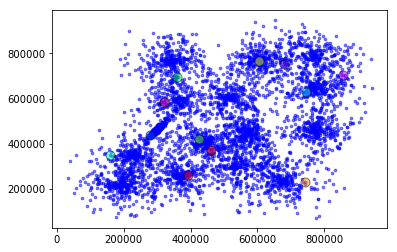

In [6]:
cmap = get_cmap(ncluster)
plt.scatter(iobs_x, iobs_y, c="blue", s=7 ,alpha=0.5)
for i in range(ncluster):
    plt.scatter(rc_x[i], rc_y[i], c=cmap(i), s=80, edgecolor='black' ,alpha=0.5)

rcParams['figure.figsize'] = (10, 6)
plt.show()

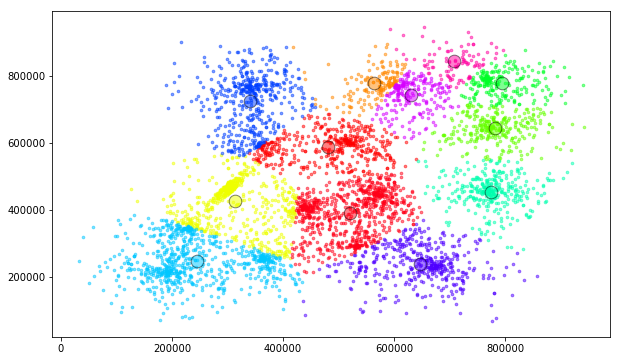

In [7]:

cmap = get_cmap(ncluster)
for i in range(ncluster):
    plt.scatter(obs(i + 1)[0], obs(i + 1)[1], c=cmap(i),s=7 ,alpha=0.5)
    #plt.scatter(rc_x[i], rc_y[i], c=cmap(i),s=80, edgecolor='black' ,alpha=0.5)
    plt.scatter(nc_x[i], nc_y[i], c=cmap(i),s=160, edgecolor='black' ,alpha=0.5)
#for i in range(300):
#    plt.scatter(obs_x[i], obs_y[i], c=cmap(obs_k[i]-1),s=7 ,alpha=0.5)
rcParams['figure.figsize'] = (10, 6)
plt.show()

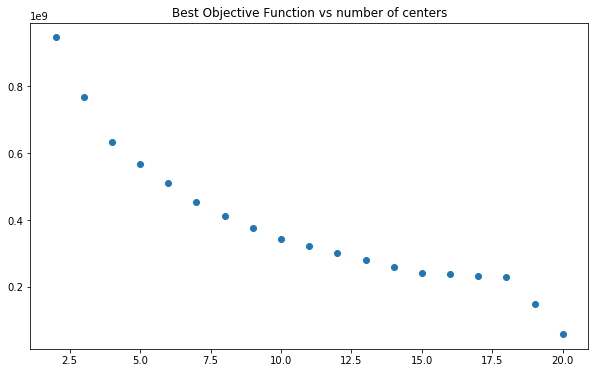

In [10]:
f2 = open("data/data_cluster.txt","r")

f2 = [line for line in f2]
f2 = [line.strip() for line in f2]
f2 = [filter(None,f2[i].split('   ')) for i in range(len(f2))]
f2 = [[float(line[0]),float(line[1]), float(line[2])] for line in f2]
ncluster = [line[0] for line in f2 ]
obj_min = [line[1] for line in f2 ]

plt.title("Best Objective Function vs number of centers (Scree Test)")
plt.plot(ncluster,obj_min, "o")
plt.show()
# n = 18 seems to be the best!